In [2]:
import numpy as np 
import pandas as pd
import altair as alt 
import re 
import os 
import ntpath
import sys
sys.path.append(r'../.')
from commons.data_processing import *

In [3]:
files = get_files(r'E:\Research\PEAKS\20200316_PANC1_Glyco_Columns\PANC1', exts=['-peptides.csv'])

In [4]:
# create a blank DataFrame
df = pd.DataFrame()
# add identifier to each file and add to DF
for file in files:
    sub = pd.read_csv(file)
    source = ntpath.dirname(file)
    source = source.split('\\')[-1]
    sub['source'] = [source]*len(sub)
    if re.search('BP', file):
        sub['source_ident'] = ['BP']*len(sub)
    elif re.search('C18', file):
        sub['source_ident'] = ['C18']*len(sub)
    else:
        sub['source_ident'] = ['PGC']*len(sub)
    if df.empty:
        df = sub
        continue
    df = pd.concat([df, sub])

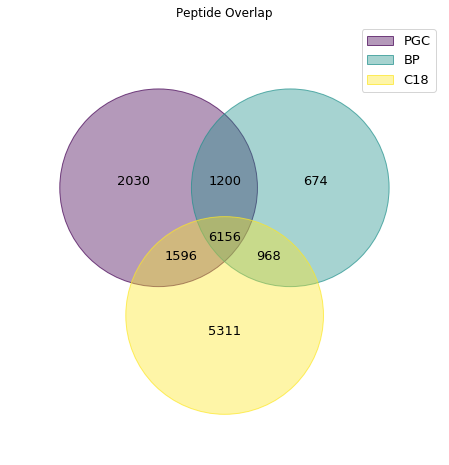

In [11]:
from venn import venn

s = {}
s['PGC'] = set(df[df.source_ident=='PGC'].Peptide.tolist())
s['BP'] = set(df[df.source_ident=='BP'].Peptide.tolist())
s['C18'] = set(df[df.source_ident=='C18'].Peptide.tolist())

venn(s)
plt.title('Peptide Overlap')
plt.savefig('./Venn Diagrams/Peptide Overlap.svg')

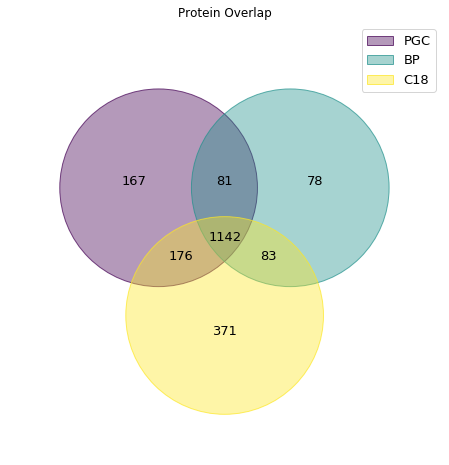

In [12]:
s = {}
s['PGC'] = set(df[df.source_ident=='PGC']['Protein Accession'].tolist())
s['BP'] = set(df[df.source_ident=='BP']['Protein Accession'].tolist())
s['C18'] = set(df[df.source_ident=='C18']['Protein Accession'].tolist())

venn(s)
plt.title('Protein Overlap')
plt.savefig('./Venn Diagrams/Protein Overlap.svg')